In [0]:
from collections import defaultdict
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import heapq

**reading the given text file**

In [0]:
f = open('/content/drive/My Drive/wiki-Vote.txt','r')

In [0]:
read_file = f.read().splitlines(True)

###**Ques 1**

**Creating adjacency list**

In [0]:
adjacency_list = defaultdict(list)                     # adjacency list for the graph
nodes = set()                                          # set of nodes
edges = 0                                              # number of edges

# 1st 4 lines in the given text file consists of meta-data. 
# Thus, started reading after that
for line in read_file[4:]:                                  
  edges += 1
  a = line.split('\t')
  adjacency_list[a[0]].append(a[1].strip('\n'))
  nodes.add(a[0])
  nodes.add(a[1].strip('\n'))

In [0]:
print(len(nodes))

7115


In [0]:
print(edges)

103689


**Mapping the nodes to serial numbers**

In [0]:
mapping = defaultdict()

count = 0

for i in nodes:
  mapping[i] = count
  count += 1

In [0]:
mapping

**Creating adjacency matrix**

In [0]:
adjacency_matrix = np.zeros([len(nodes),len(nodes)])

for node_from in adjacency_list:
  i = mapping[node_from]

  for node_to in adjacency_list[node_from]:
    j = mapping[node_to]
    adjacency_matrix[i][j] = 1

**Avg. out-degree**
> out-degree of a node is equal to the number of non-zero entries in adjacency matrix in the row of that node

In [0]:
out_degree_sum = 0

for i in range(0,len(nodes)):
  # extracting the row corresponding to node i from the adjacency matrix
  l = adjacency_matrix[i,:]               
  out_degree_sum += np.count_nonzero(l)

avg_out_degree = out_degree_sum/len(nodes)

In [0]:
print(avg_out_degree)

14.573295853829936


**Avg. in-degree**

> in-degree of a node is equal to the number of non-zero entries in adjacency matrix in the column of that node



In [0]:
in_degree_sum = 0

for i in range(0,len(nodes)):
  # extracting the column corresponding to node i from the adjacency matrix
  l = adjacency_matrix[:,i]                   
  in_degree_sum += np.count_nonzero(l)

avg_in_degree = in_degree_sum/len(nodes)

In [0]:
print(avg_in_degree)

14.573295853829936


**Max out-degree**

In [0]:
out_degree = []

for i in range(0,len(nodes)):
  l = adjacency_matrix[i,:]            # extracting the row corresponding to ith node
  out_degree.append((np.count_nonzero(l),i))

max_out = max(out_degree, key = lambda x : x[0])

In [0]:
for key,value in mapping.items():
  if(value == max_out[1]):
    print("The node with maximum out-degree is",key)

print("Its out-degree is",max_out[0])

The node with maximum out-degree is 2565
Its out-degree is 893


**Max in-degree**

In [0]:
in_degree = []

for i in range(0,len(nodes)):
  l = adjacency_matrix[:,i]                   # extracting the column corresponding to ith node
  in_degree.append((np.count_nonzero(l),i))

max_in = max(in_degree, key = lambda x : x[0])

In [0]:
for key,value in mapping.items():
  if(value == max_in[1]):
    print("The node with maximum out-degree is",key)

print("Its out-degree is",max_in[0])

The node with maximum out-degree is 4037
Its out-degree is 457


**Network Density**

> density = edges / nodes(nodes-1)



In [0]:
N = len(nodes)
density = edges/(N * (N-1))
print(density)

0.0020485375110809584


**Degree Distribution**

in-degree distribution

In [0]:
in_count = []

for i in in_degree:
  in_count.append(i[0])

x1 = []
y1 = []

for key,value in Counter(in_count).items():
  x1.append(key)
  y1.append(value)

out-degree distribution

In [0]:
out_count = []

for i in out_degree:
  out_count.append(i[0])

x2 = []
y2 = []

for key,value in Counter(out_count).items():
  x2.append(key)
  y2.append(value)

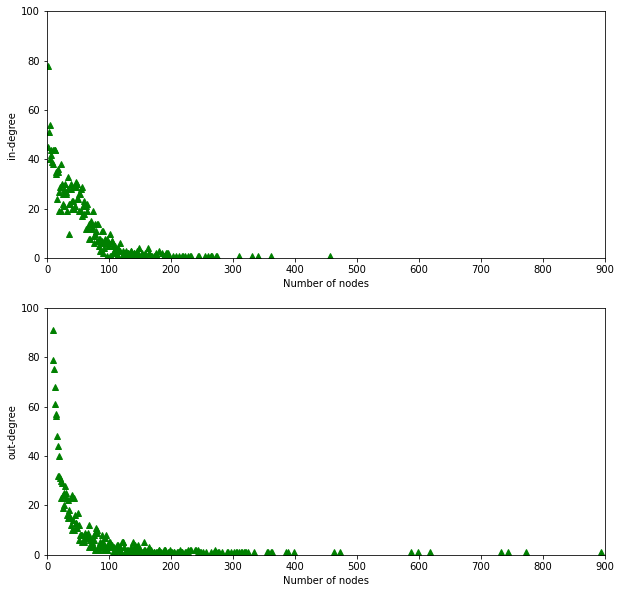

In [0]:
f, axs = plt.subplots(2,2,figsize=(10,10))

plt.subplot(211)
plt.plot(x1,y1,'g^')
plt.xlim(0, 900)
plt.ylim(0, 100)
plt.ylabel("in-degree")
plt.xlabel("Number of nodes")

plt.subplot(212)
plt.plot(x2,y2,'g^')
plt.xlim(0, 900)
plt.ylim(0, 100)
plt.ylabel("out-degree")
plt.xlabel("Number of nodes")

plt.show()

**Clustering Coefficient**

In [0]:
# reference : https://core.ac.uk/download/pdf/54929154.pdf

A = adjacency_matrix
A_t = A.transpose()

temp = A + A_t
temp1 = np.dot(temp,temp)
d_num = np.dot(temp1,temp)

d_reciprocal = np.dot(A,A)

In [0]:
def cluster_coeff(A):
  clustering_coeff = defaultdict(lambda:0.0)

  n = len(A)
  for i in range(n):
    degree_i = out_count[i] + in_count[i]

    if(degree_i < 2):                                  
      clustering_coeff[i] = 0              # node with 0 neighbours has clustering coeff = 0
    else:
      clustering_coeff[i] = d_num[i][i]/(2*degree_i*(degree_i - 1) - d_reciprocal[i][i])
  
  return clustering_coeff

In [0]:
clustering_coeff = cluster_coeff(adjacency_matrix)

In [0]:
clustering_coeff 

clustering coefficient distribution

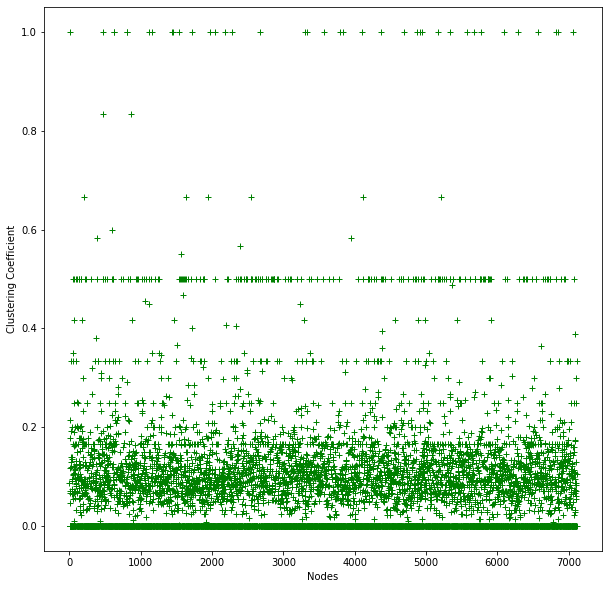

In [0]:
plt.figure(figsize=(10,10))

plt.plot(list(mapping.values()),list(clustering_coeff.values()),'g+')

plt.ylabel("Clustering Coefficient")
plt.xlabel("Nodes")
plt.show()

**Degree Centrality**


> The degree centrality for a node v is the fraction of nodes it is connected to.

In [0]:
deg_central = defaultdict(lambda:0.0)

for i in range(len(nodes)):
  k = out_count[i] + in_count[i]          # number of neighbouring nodes
  deg_central[i] = k/len(nodes)

In [0]:
deg_central

###**Ques 2**

**creating networkx graph from adjacency matrix**

In [0]:
G = nx.from_numpy_matrix(adjacency_matrix, parallel_edges = False, create_using=nx.DiGraph)

**Rank of each node**

In [0]:
rank = nx.pagerank(G)

In [0]:
rank

{0: 0.0004984872561325486,
 1: 0.0007088859208279406,
 2: 0.00021565626563317325,
 3: 5.048782345863015e-05,
 4: 5.048782345863015e-05,
 5: 5.048782345863015e-05,
 6: 5.048782345863015e-05,
 7: 5.048782345863015e-05,
 8: 5.048782345863015e-05,
 9: 5.048782345863015e-05,
 10: 0.0001107747048979973,
 11: 5.048782345863015e-05,
 12: 5.048782345863015e-05,
 13: 6.582699034438123e-05,
 14: 5.048782345863015e-05,
 15: 5.048782345863015e-05,
 16: 5.048782345863015e-05,
 17: 5.048782345863015e-05,
 18: 5.048782345863015e-05,
 19: 5.048782345863015e-05,
 20: 5.048782345863015e-05,
 21: 5.048782345863015e-05,
 22: 5.048782345863015e-05,
 23: 5.048782345863015e-05,
 24: 5.048782345863015e-05,
 25: 6.078586683229992e-05,
 26: 5.048782345863015e-05,
 27: 0.00013070416911440568,
 28: 5.048782345863015e-05,
 29: 5.048782345863015e-05,
 30: 5.048782345863015e-05,
 31: 5.048782345863015e-05,
 32: 5.048782345863015e-05,
 33: 7.874363296929917e-05,
 34: 0.0003757097896936111,
 35: 5.048782345863015e-05,


**Hub and authority of each node**

In [0]:
hub,authority = nx.hits(G)

In [0]:
hub 

In [0]:
authority 

**Comparison between the three**

In [0]:
r = list(rank.values())

In [0]:
a = list(authority.values())

In [0]:
h = list(hub.values())

In [0]:
n = list(mapping.values())

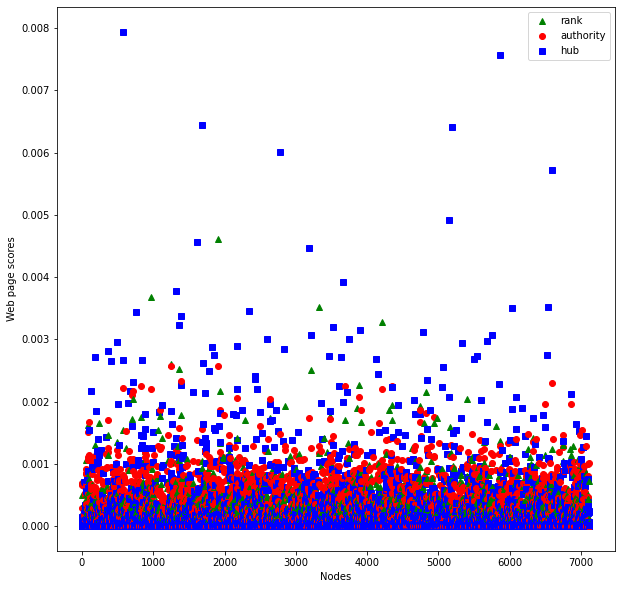

In [0]:
plt.figure(figsize=(10,10))
for x1,y1,y2,y3 in zip(n,r,a,h):
  plt.plot(x1,y1,'g^',label = "rank")                  # for rank
  plt.plot(x1,y2,'ro',label = "authority")             # for authority
  plt.plot(x1,y3,'bs',label = "hub")                   # for hub

plt.ylabel("Web page scores")
plt.xlabel("Nodes")
plt.legend(['rank','authority','hub'], loc='best')
plt.show()

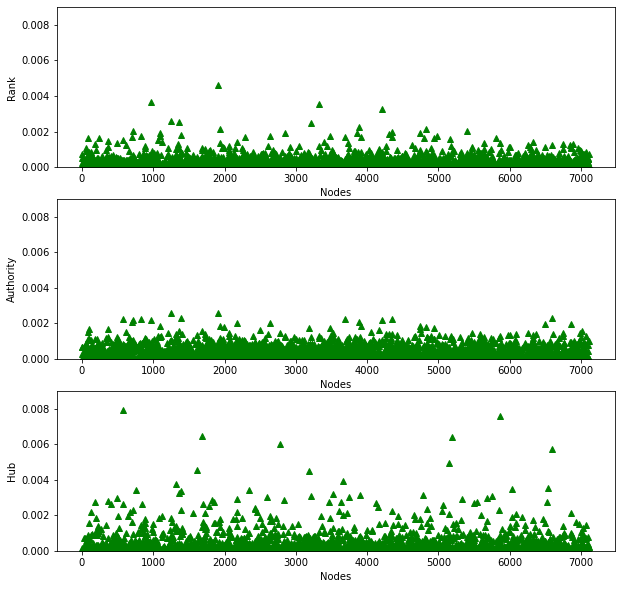

In [0]:
f, axs = plt.subplots(3,2,figsize=(10,10))

plt.subplot(311)
plt.plot(n,r,'g^')
# plt.xlim(0, 900)
plt.ylim(0,0.009)
plt.ylabel("Rank")
plt.xlabel("Nodes")

plt.subplot(312)
plt.plot(n,a,'g^')
# plt.xlim(0, 900)
plt.ylim(0,0.009)
plt.ylabel("Authority")
plt.xlabel("Nodes")

plt.subplot(313)
plt.plot(n,h,'g^')
# plt.xlim(0, 900)
plt.ylim(0,0.009)
plt.ylabel("Hub")
plt.xlabel("Nodes")

plt.show()

**finding top 10 results**

In [0]:
top_rank = heapq.nlargest(10, rank.items(), key=lambda x: x[1])
print(top_rank)

[(1902, 0.004612715891167531), (974, 0.00368122072952927), (3322, 0.0035248136576402542), (4206, 0.0032863743692308975), (1247, 0.002605333171725015), (1361, 0.0025301053283849494), (3209, 0.0025047038004839873), (3887, 0.002266263304236342), (1931, 0.0021701850491959566), (4820, 0.0021500675059293213)]


In [0]:
top_authority = heapq.nlargest(10, authority.items(), key=lambda x: x[1])
print(top_authority)

[(1247, 0.002580147178008915), (1902, 0.0025732411241428006), (1393, 0.0023284150915378952), (6588, 0.0023037314804751022), (829, 0.0022558748563742364), (3696, 0.0022534066884266407), (4348, 0.0022501446367953534), (569, 0.002223564103945867), (974, 0.0022015434925438102), (4206, 0.0021978968035237826)]


In [0]:
top_hub = heapq.nlargest(10, hub.items(), key=lambda x: x[1])
print(top_hub)

[(569, 0.007940492708074044), (5858, 0.00757433529744451), (1689, 0.006440248991012537), (5185, 0.006416870490195661), (2783, 0.00601056790243335), (6588, 0.005720754058398654), (5147, 0.004921182064008291), (1619, 0.004572040701802761), (3185, 0.004467888792672382), (3663, 0.0039188817320476325)]
